<a href="https://colab.research.google.com/github/Olamide643/Auto/blob/main/Revisit_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Machine Learning Tutorial

In [2]:
# Downloaidng the data set

In [3]:
import os
import tarfile
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [4]:
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
      os.makedirs(housing_path)
      tgz_path = os.path.join(housing_path, "housing.tgz")
      urllib.request.urlretrieve(housing_url, tgz_path)
      housing_tgz = tarfile.open(tgz_path)
      housing_tgz.extractall(path=housing_path)
      housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

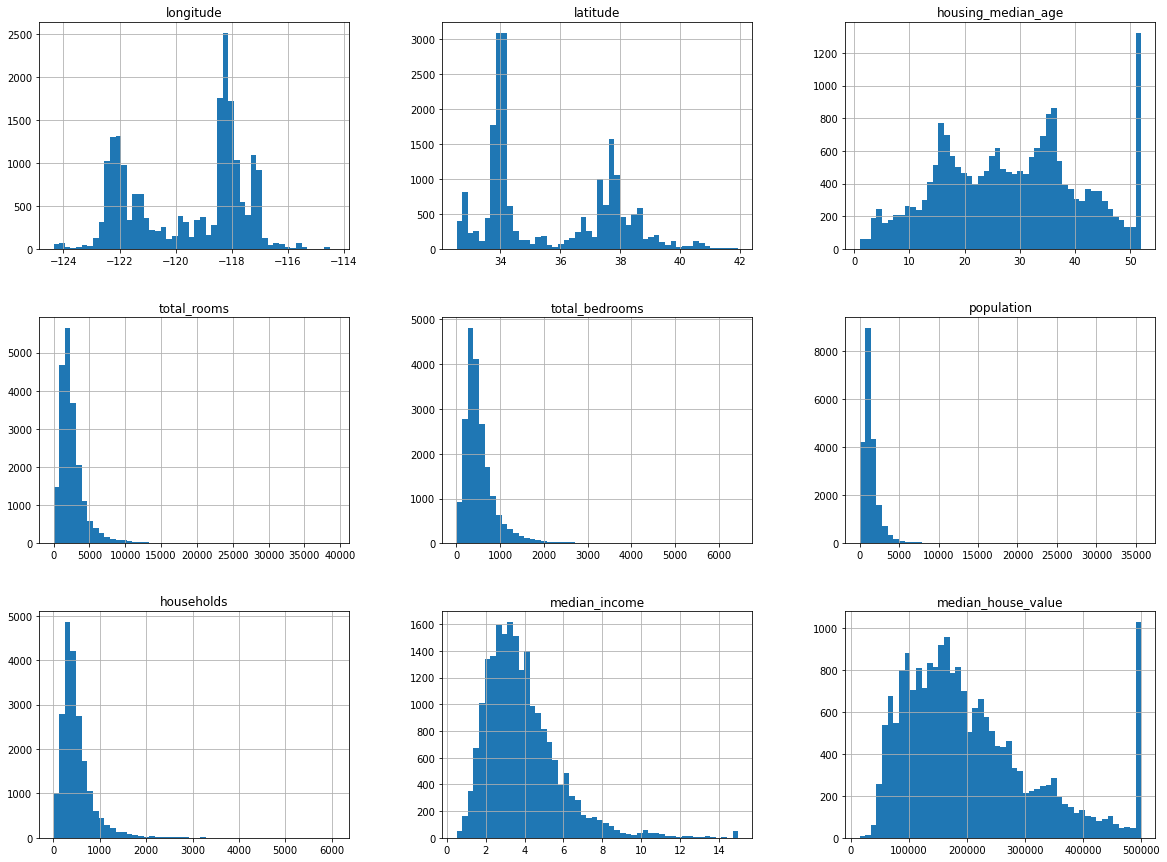

In [12]:
%matplotlib inline  
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
def plot_two_varibales():
    cols = train_set.columns[:-1]

    for y_index,y_columns in enumerate(cols):
      for x_index,x_columns in enumerate(cols[y_index:]):
        sns.scatterplot( x=x_columns, y=y_columns, data = train_set, alpha =0.1)
        plt.show()


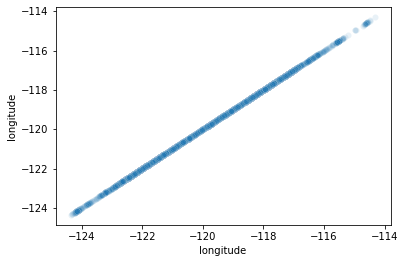

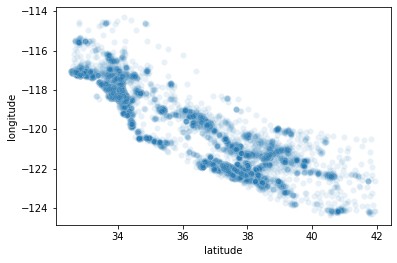

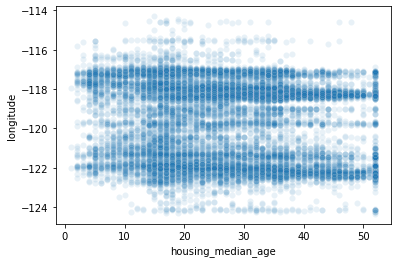

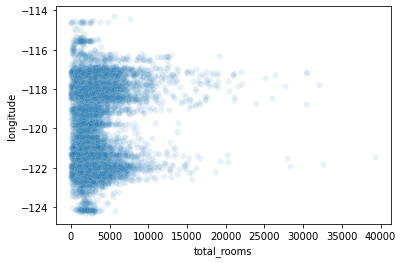

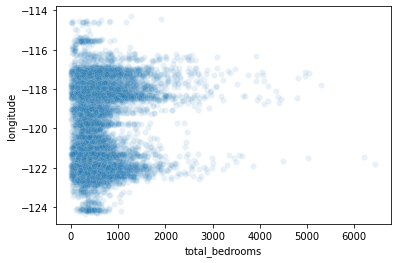

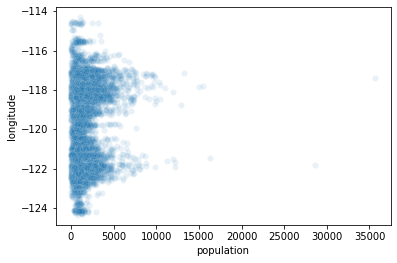

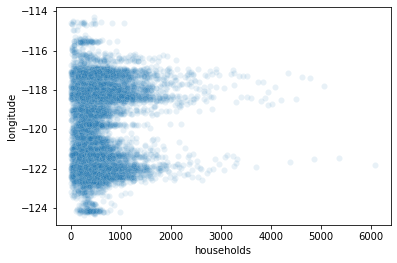

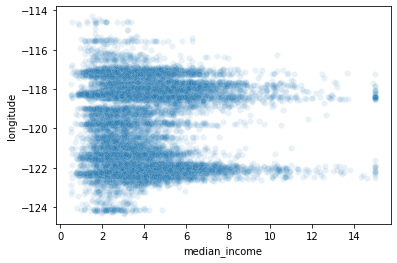

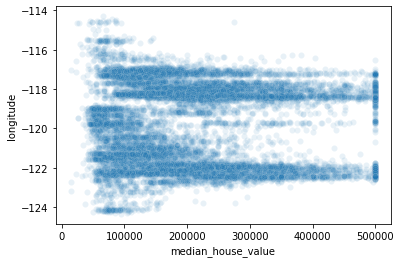

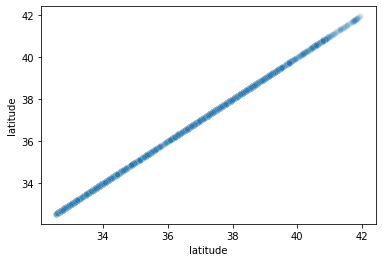

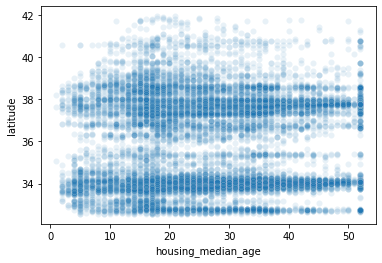

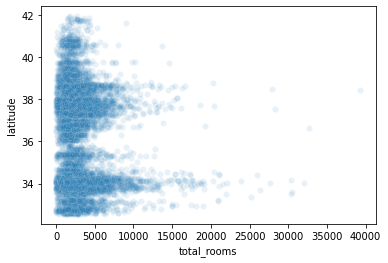

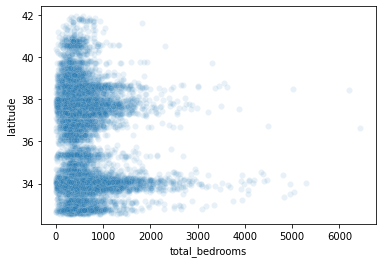

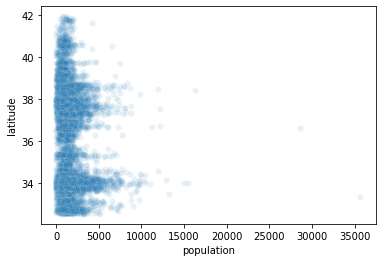

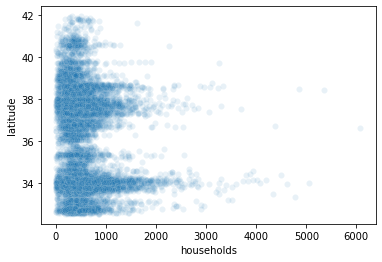

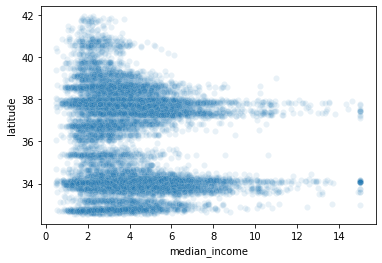

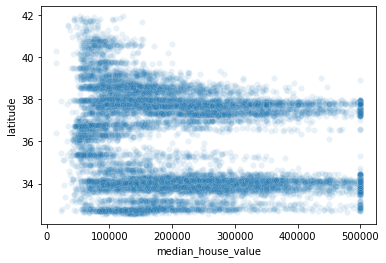

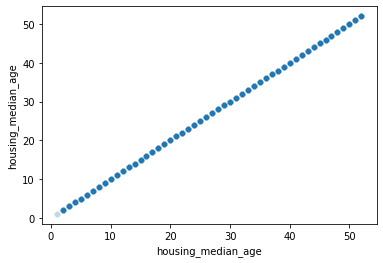

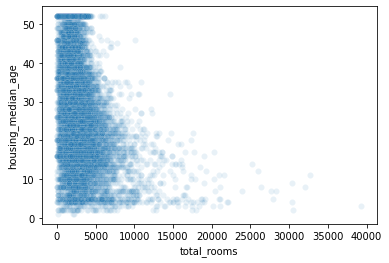

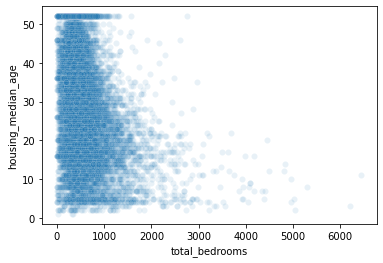

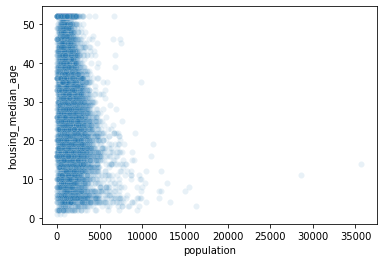

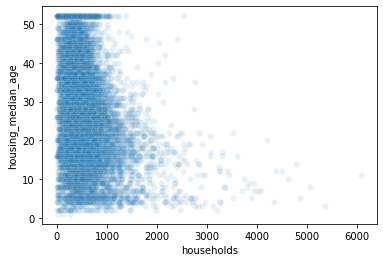

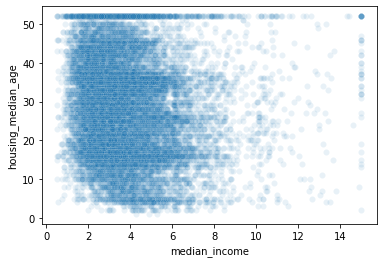

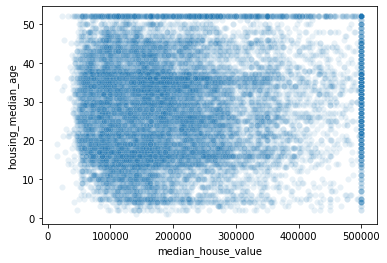

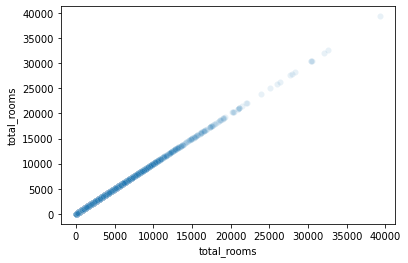

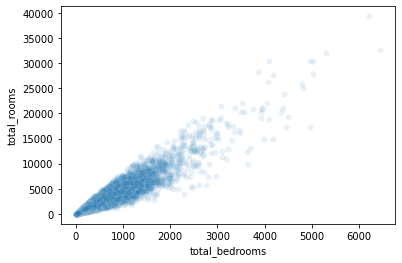

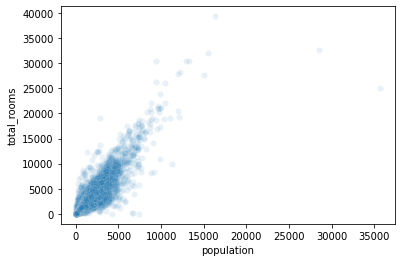

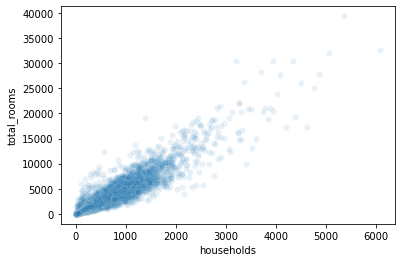

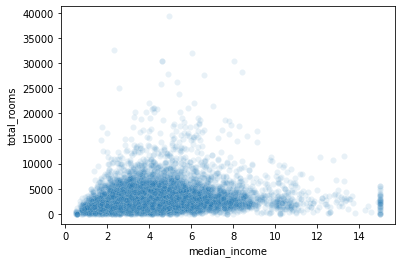

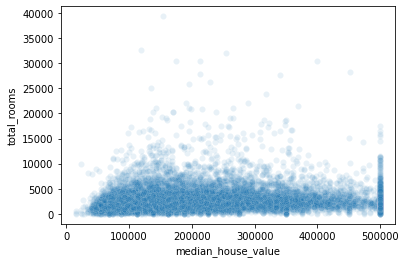

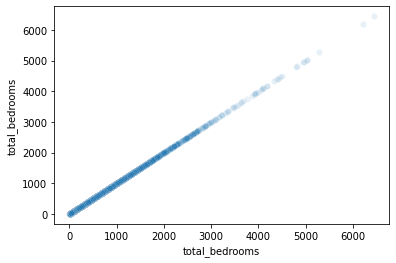

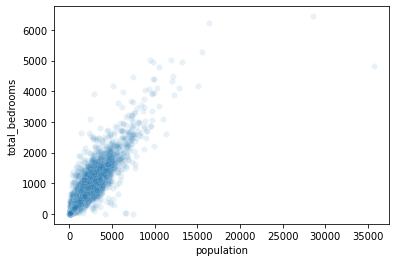

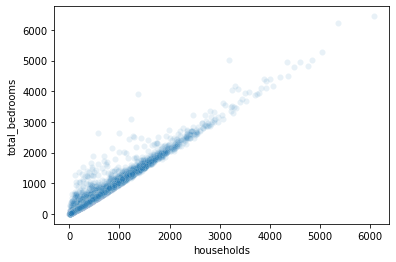

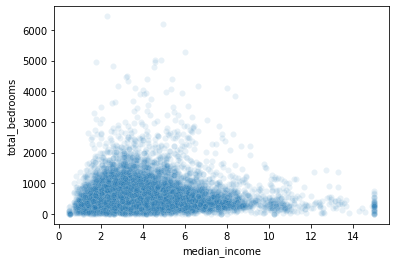

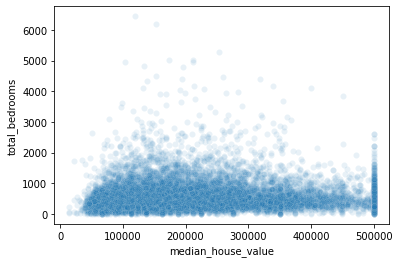

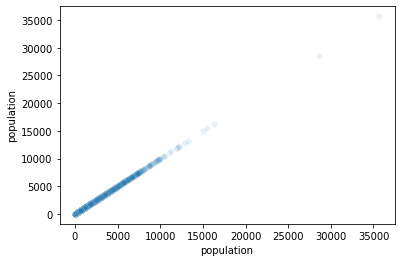

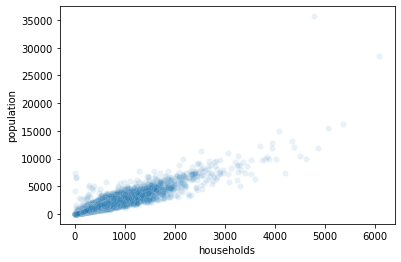

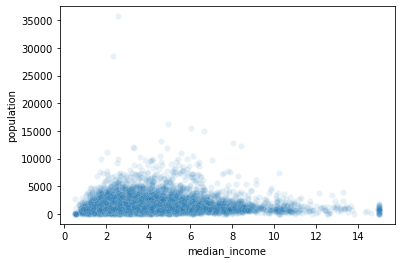

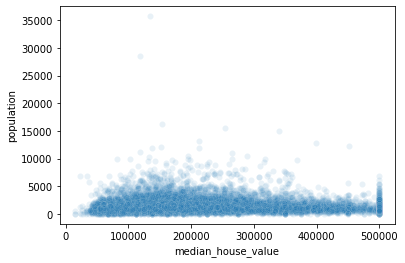

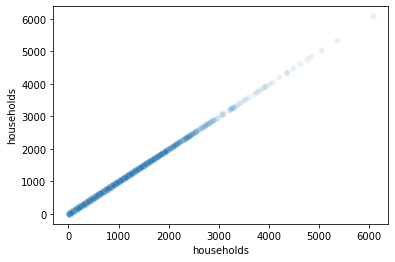

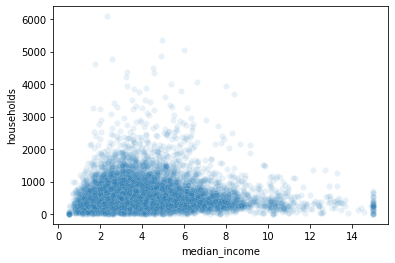

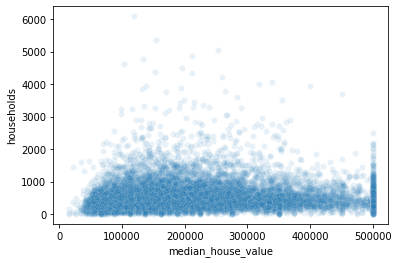

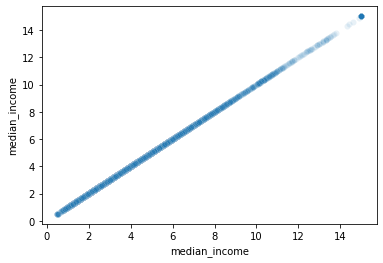

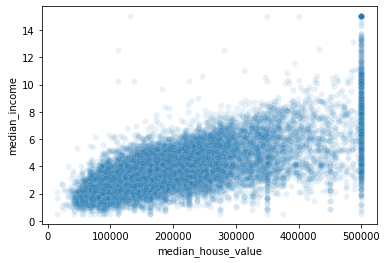

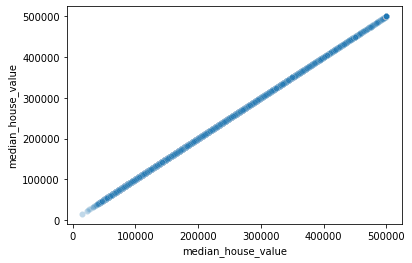

In [15]:
plot_two_varibales()

In [16]:
housing_corr = train_set.corr()
housing_corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924485           -0.101818     0.038676   
latitude            -0.924485  1.000000            0.005296    -0.029224   
housing_median_age  -0.101818  0.005296            1.000000    -0.360922   
total_rooms          0.038676 -0.029224           -0.360922     1.000000   
total_bedrooms       0.063064 -0.059998           -0.320624     0.930489   
population           0.094276 -0.102499           -0.292283     0.857936   
households           0.049306 -0.064061           -0.302796     0.920482   
median_income       -0.017040 -0.076571           -0.121711     0.198268   
median_house_value  -0.046349 -0.142983            0.103706     0.133989   

                    total_bedrooms  population  households  median_income  \
longitude                 0.063064    0.094276    0.049306      -0.017040   
latitude                 -0.059998   -0.102499   -0.064061      -0.076571   
housing_median_age       -0.320624   -0.292283   -0.302796      -0.121711   
total_rooms               0.930489    0.857936    0.920482       0.198268   
total_bedrooms            1.000000    0.878932    0.980255      -0.009141   
population                0.878932    1.000000    0.907452       0.004122   
households                0.980255    0.907452    1.000000       0.012776   
median_income            -0.009141    0.004122    0.012776       1.000000   
median_house_value        0.047980   -0.026032    0.063714       0.690647   

                    median_house_value  
longitude                    -0.046349  
latitude                     -0.142983  
housing_median_age            0.103706  
total_rooms                   0.133989  
total_bedrooms                0.047980  
population                   -0.026032  
households                    0.063714  
median_income                 0.690647  
median_house_value            1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83a296ab80>,
      dtype=object)

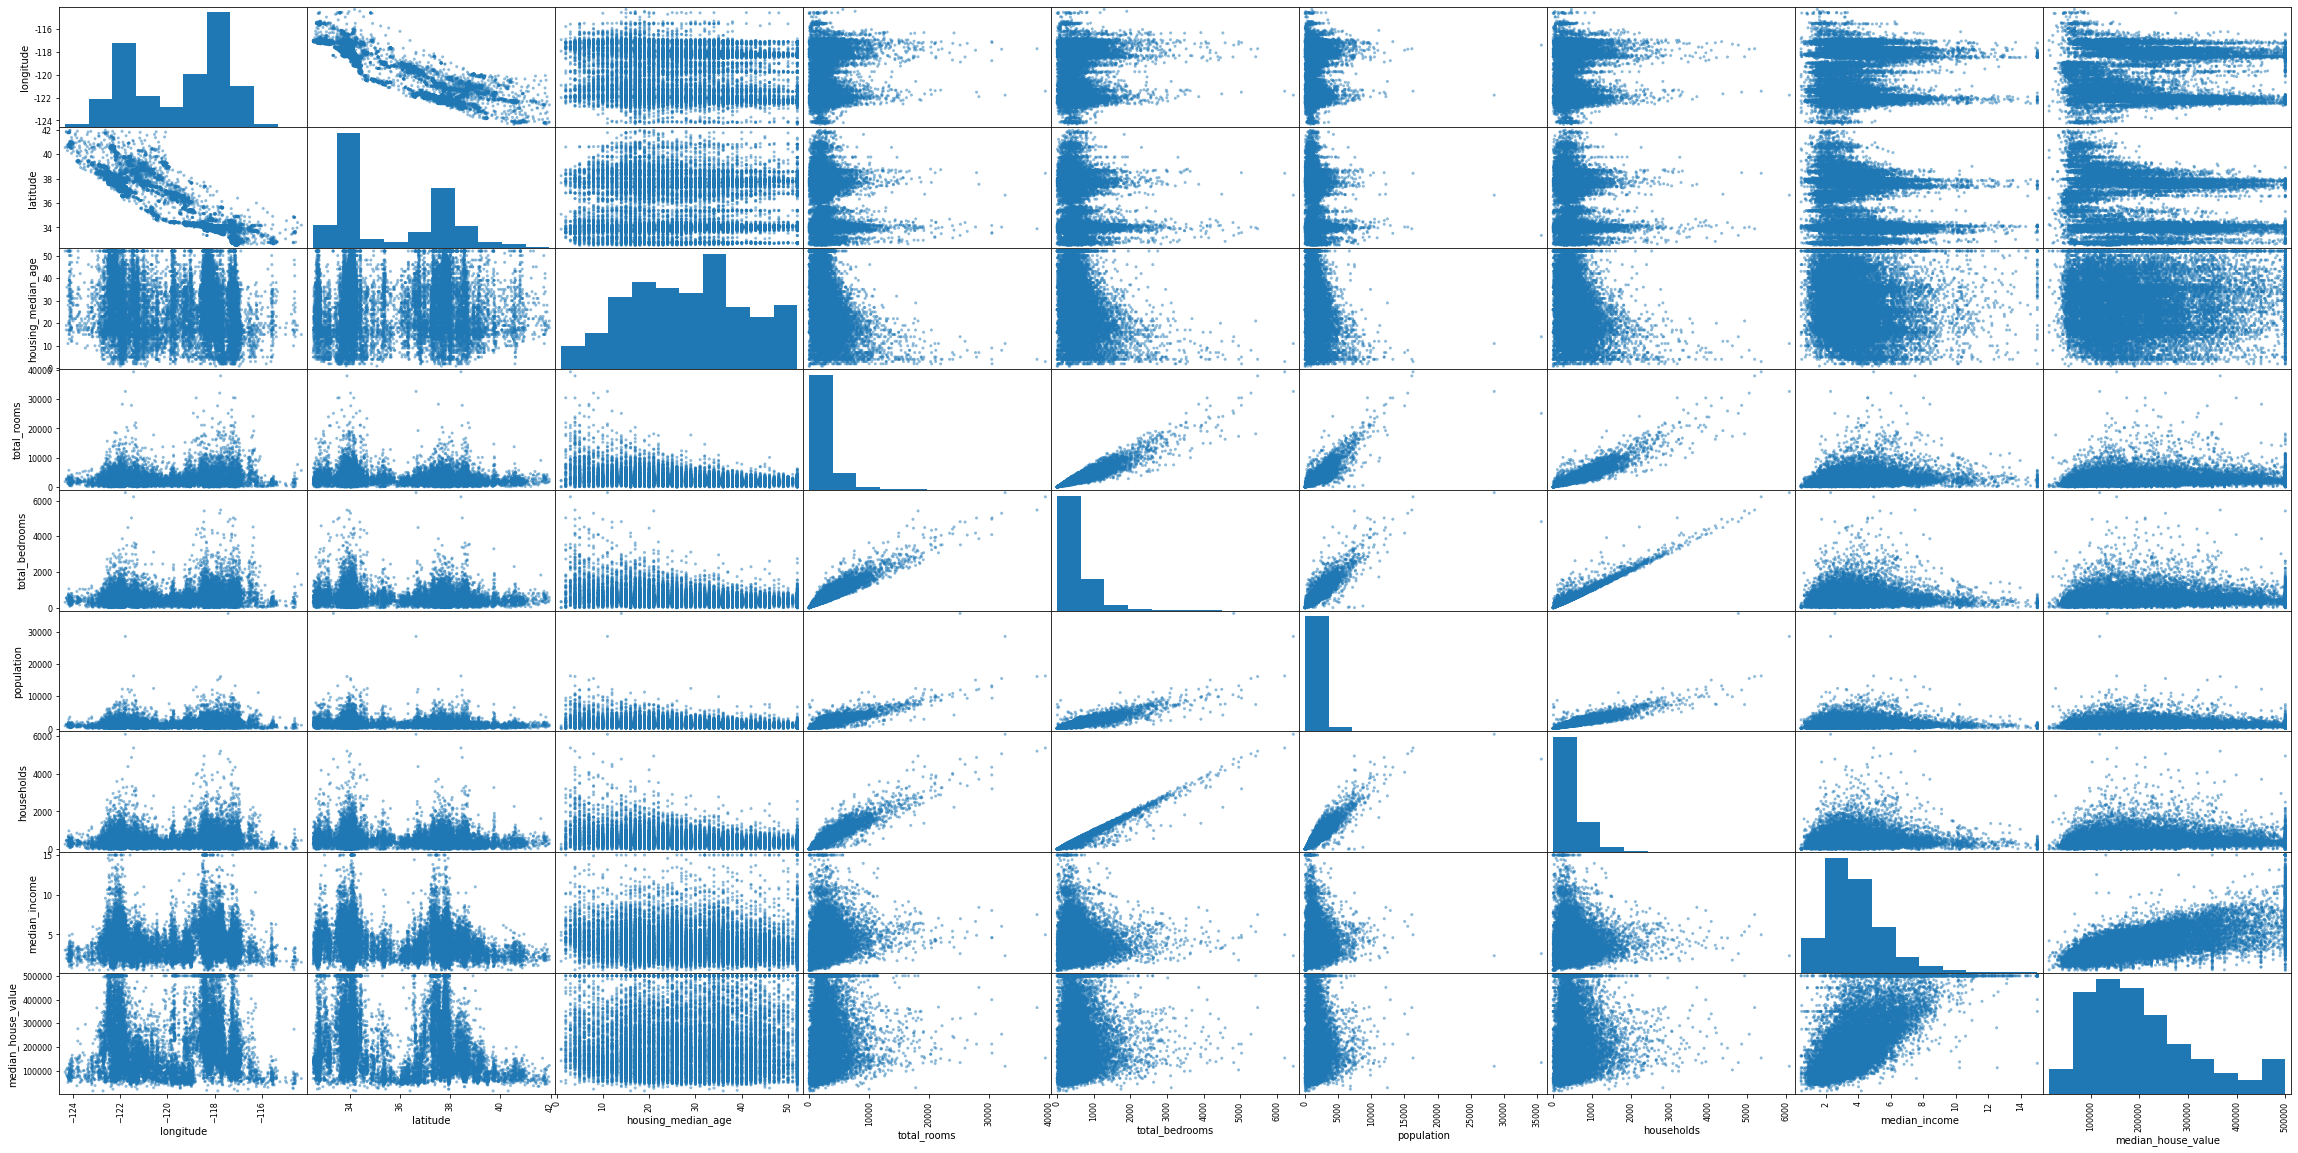

In [17]:
from pandas.plotting import scatter_matrix
attributes = train_set.columns 
#["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(40, 20))

In [18]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   
...           ...         ...            ...                 ...   
15362      1351.0       452.0         4.6050            263300.0   
16623      1650.0       705.0         2.7266            266800.0   
18086      1585.0       568.0         9.2298            500001.0   
2144       1227.0       474.0         2.7850             72300.0   
3665       1671.0       448.0         3.5521            151500.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN  
...               ...  
15362       <1H OCEAN  
16623      NEAR OCEAN  
18086       <1H OCEAN  
2144           INLAND  
3665        <1H OCEAN  

[4128 rows x 10 columns]

In [19]:
housing_features = housing.drop('median_house_value',axis =1)
housing_label = housing['median_house_value']

In [20]:
housing_features = pd.get_dummies(data = housing_features, columns=['ocean_proximity'])
housing_features

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0           322.0       126.0         8.3252                          0   
1          2401.0      1138.0         8.3014                          0   
2           496.0       177.0         7.2574                          0   
3           558.0       219.0         5.6431                          0   
4           565.0       259.0         3.8462                          0   
...           ...         ...            ...                        ...   
20635       845.0       330.0         1.5603                          0   
20636       356.0       114.0         2.5568                          0   
20637      1007.0       433.0         1.7000                          0   
20638       741.0       349.0         1.8672                          0   
20639      1387.0       530.0         2.3886                          0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20640 rows x 13 columns]

In [21]:
X_train, X_test, y_train,y_test = train_test_split(housing_features,housing_label, test_size = 0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


def training_pipeline(model, X_train, y_train,imputer = None, pca= None, sampler=False):
  steps =[]
  if imputer:
    steps.append(('imputer',SimpleImputer(strategy=imputer)))
  if pca:
    steps.append(('pca', PCA(n_components=pca)))
  if sampler:
    steps.append(('over-smapling',RandomOverSampler()))
  steps.append(('standard',StandardScaler()))
  steps.append(('model',model))
  #steps.append(('cross_validatinon',cross_val_score(cv=10,scoring="neg_mean_squared_error")))
  model_pipeline = Pipeline(steps=steps)
  model_pipeline.fit(X_train,y_train)

  return model_pipeline

In [23]:
def mean_error(model_pipeline,X_test,y_test):
  y_pred = model_pipeline.predict(X_test)
  mean_error = mean_squared_error(y_pred,y_test)
  lin_rmse = np.sqrt(mean_error)
  return lin_rmse


In [24]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from pandas.core.algorithms import mode
from tensorflow.python import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Using Neural Network
import tensorflow as tf 
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def neural_net(neutrons,epochs, batch_size,drop_out_prob):

  model = Sequential([
      Dense(units=neutrons,activation='relu',input_shape=(13,)),
      Dropout(drop_out_prob),
      Dense(neutrons,activation='relu'),
      Dropout(drop_out_prob),
      Dense(neutrons,activation='relu'),
      Dropout(drop_out_prob),
      Dense(1)])
  opt = Adam(learning_rate=0.01)
  model.compile(optimizer = 'adam', loss = "mean_squared_error", metrics=['accuracy'])
  nn_model = KerasRegressor(model=model, epochs=epochs, batch_size=batch_size, verbose=0)

  return nn_model



set_of_models = [
   # ('Regression_Model',LinearRegression()),
    #('DecisionTree', DecisionTreeRegressor()),
    #('Random Forest', RandomForestRegressor(n_estimators=100)),
    #('SVM',SVR(kernel= 'linear')),
    ("Neural Networkk",neural_net(64,100,32,0.2))
    ]


for model_name, model in set_of_models:
  print()
  model_pipeline = training_pipeline(model,X_train, y_train,imputer = "median")

  # The model validation
  mean_error_val = mean_error(model_pipeline,X_test,y_test)
  print(f"The mean Square Error for {model_name} is {mean_error_val}")
  scores = cross_val_score(model_pipeline, X_train, y_train, cv=10)
  print(f" {model_name} ==>  scores: {scores}    \nmean : {scores.mean()} and  standard deviation :{scores.std()}")


  if model_name == "Neural Networkk":
    pd.DataFrame(model_pipeline.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()




The mean Square Error for Neural Networkk is 64311.79484952838


AttributeError: ignored

In [ ]:
# Model Validation and 